In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm 
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df= pd.read_csv('data.csv',delimiter=',',low_memory=False)
df.describe()

,Sex,Age_bucket,Year,Mortality_rate,SP.URB.TOTL.IN.ZS,SP.URB.GROW,SP.POP.GROW,SE.PRM.DURS,AG.SRF.TOTL.K2,SE.PRE.DURS,...,EN.ATM.CO2E.LF.KT,EN.ATM.METH.AG.KT.CE,EN.ATM.METH.EG.KT.CE,EN.ATM.NOXE.AG.KT.CE,EN.ATM.NOXE.EG.KT.CE,NY.GDP.TOTL.RT.ZS,EN.ATM.CO2E.KT,EN.ATM.CO2E.PC,NY.GDP.MKTP.CD,NY.GDP.PCAP.CD
count,37264.000000,37264.000000,37264.000000,37264.000000,37264.000000,37264.000000,37264.000000,37264.000000,3.726400e+04,37264.000000,...,37264.000000,37264.000000,37264.000000,37264.000000,37264.000000,37264.000000,3.726400e+04,37264.000000,3.726400e+04,37264.000000
mean,1.499785,8.500000,2007.176900,50.884518,67.660807,1.252047,0.941133,5.598111,7.703405e+05,2.810219,...,53455.527965,13970.297149,11629.266864,8477.428963,1013.843177,5.228333,1.327179e+05,7.527603,3.562845e+11,18949.875301
std,0.500007,4.609834,4.243968,132.585822,18.536914,1.801041,1.599175,0.978053,2.351910e+06,0.825256,...,98272.432955,36415.347075,39544.807912,19171.654263,1748.459431,10.057098,2.527069e+05,7.618949,7.982917e+11,20487.233315
min,1.000000,1.000000,2000.000000,0.000000,9.092000,-2.697859,-2.850973,3.000000,1.800000e+02,1.000000,...,-4781.768000,0.000000,0.000000,0.000000,0.000000,0.000000,2.566900e+01,0.180554,6.310127e+07,329.781984
25%,1.000000,4.750000,2004.000000,0.000000,54.526000,0.256457,0.181115,5.000000,2.207000e+04,2.000000,...,4517.744000,613.661061,367.499687,332.796577,58.667239,0.188408,7.425675e+03,2.723018,1.437327e+10,4146.987928
50%,1.000000,8.500000,2007.000000,1.260432,68.125000,1.045134,0.745507,6.000000,9.303000e+04,3.000000,...,17638.270000,3221.288138,1763.285705,2390.035148,201.079454,1.192305,4.294424e+04,5.463501,5.713624e+10,10353.447983
75%,2.000000,12.250000,2011.000000,32.844219,82.220000,1.908281,1.424580,6.000000,3.851780e+05,3.000000,...,41671.788000,11915.265350,11734.036958,8063.684071,807.709166,4.784801,1.069077e+05,9.318429,2.699801e+11,27726.481054
max,2.000000,16.000000,2015.000000,1428.571429,100.000000,17.899614,17.624770,8.000000,1.709825e+07,4.000000,...,661332.449000,315949.829234,406730.780472,157461.517800,8035.202214,80.920595,1.768073e+06,67.452198,6.203213e+12,117507.808593


In [3]:
df["Country"] = df["Country"].astype('category')
df["Country_code"] = df["Country"].cat.codes
#type(df3["Country_code"].values[1])

In [6]:
#Regression ==> Classification
df1=df.copy()
df1.sort_values(by=['Mortality_rate'], ascending=False)
df1['Mortality_rate'].quantile([0,.1,.2,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,.96,.97,.98,.99,1])
df1[df1['Mortality_rate']==0].count() # il y a 13051 lignes avec des zéros sur 37264 au total => il y a 35.0230786% avec des zéros
 
# on crée 18 tranches
df1['Mortality_cat'] = pd.qcut(df1['Mortality_rate'] , q = [0,0.350230786,0.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,.96,.97,.98,.99,1], 
    labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]) 
df1.groupby(['Mortality_cat'])['Mortality_cat'].count()
df1.groupby(['Mortality_cat'])['Mortality_rate'].mean()
#df4.loc[df4['Mortality_rate'] == 0, "Mortality_rate"] = 0
#df4.loc[(df4['Mortality_rate'] > 0) & (df4['Mortality_rate'] <= 17), "Mortality_rate"] = 1
df1["Mortality_rate"]=df1["Mortality_rate"].astype('category').cat.codes
#type(df4["Mortality_rate"].values[1])

In [7]:
df1['Mortality_cat'].unique()

[1, 11, 13, 12, 15, ..., 3, 5, 7, 16, 18]
Length: 18
Categories (18, int64): [1 < 2 < 3 < 4 ... 15 < 16 < 17 < 18]

## Train test split

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Y1=df['Mortality_rate']
X1=scaler.fit_transform(df[['Sex','Age_bucket','Year','Country_code','SP.URB.TOTL.IN.ZS',	'SP.URB.GROW',	'SP.POP.GROW',	'SE.PRM.DURS',	'AG.SRF.TOTL.K2',	'SE.PRE.DURS',	'EN.POP.DNST',	'SE.SEC.DURS',	'SP.DYN.CBRT.IN',	'SP.DYN.CDRT.IN',	'NY.ADJ.AEDU.GN.ZS',	'SP.DYN.TFRT.IN',	'SP.ADO.TFRT',	'SP.DYN.LE00.FE.IN',	'SP.DYN.LE00.IN',	'SP.POP.DPND',	'SP.DYN.AMRT.FE',	'SP.DYN.AMRT.MA',	'EN.ATM.NOXE.KT.CE',	'EN.ATM.METH.KT.CE',	'AG.LND.AGRI.K2',	'EN.ATM.GHGO.KT.CE',	'AG.LND.AGRI.ZS',	'AG.PRD.FOOD.XD',	'IT.CEL.SETS',	'AG.PRD.LVSK.XD',	'AG.PRD.CROP.XD',	'IT.MLT.MAIN',	'EN.ATM.GHGT.KT.CE',	'EN.ATM.CO2E.GF.ZS',	'EN.ATM.CO2E.LF.ZS',	'EN.ATM.CO2E.SF.ZS',	'NY.GDP.FRST.RT.ZS',	'NY.GDP.MINR.RT.ZS',	'EN.ATM.CO2E.LF.KT',	'EN.ATM.METH.AG.KT.CE',	'EN.ATM.METH.EG.KT.CE',	'EN.ATM.NOXE.AG.KT.CE',	'EN.ATM.NOXE.EG.KT.CE',	'NY.GDP.TOTL.RT.ZS',	'EN.ATM.CO2E.KT',	'EN.ATM.CO2E.PC',	'NY.GDP.MKTP.CD',	'NY.GDP.PCAP.CD']])
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1,shuffle=True,random_state=10,test_size=0.30)

In [10]:
Y=df1['Mortality_cat']
X=df1[['Sex','Age_bucket','Year','Country_code','SP.URB.TOTL.IN.ZS',	'SP.URB.GROW',	'SP.POP.GROW',	'SE.PRM.DURS',	'AG.SRF.TOTL.K2',	'SE.PRE.DURS',	'EN.POP.DNST',	'SE.SEC.DURS',	'SP.DYN.CBRT.IN',	'SP.DYN.CDRT.IN',	'NY.ADJ.AEDU.GN.ZS',	'SP.DYN.TFRT.IN',	'SP.ADO.TFRT',	'SP.DYN.LE00.FE.IN',	'SP.DYN.LE00.IN',	'SP.POP.DPND',	'SP.DYN.AMRT.FE',	'SP.DYN.AMRT.MA',	'EN.ATM.NOXE.KT.CE',	'EN.ATM.METH.KT.CE',	'AG.LND.AGRI.K2',	'EN.ATM.GHGO.KT.CE',	'AG.LND.AGRI.ZS',	'AG.PRD.FOOD.XD',	'IT.CEL.SETS',	'AG.PRD.LVSK.XD',	'AG.PRD.CROP.XD',	'IT.MLT.MAIN',	'EN.ATM.GHGT.KT.CE',	'EN.ATM.CO2E.GF.ZS',	'EN.ATM.CO2E.LF.ZS',	'EN.ATM.CO2E.SF.ZS',	'NY.GDP.FRST.RT.ZS',	'NY.GDP.MINR.RT.ZS',	'EN.ATM.CO2E.LF.KT',	'EN.ATM.METH.AG.KT.CE',	'EN.ATM.METH.EG.KT.CE',	'EN.ATM.NOXE.AG.KT.CE',	'EN.ATM.NOXE.EG.KT.CE',	'NY.GDP.TOTL.RT.ZS',	'EN.ATM.CO2E.KT',	'EN.ATM.CO2E.PC',	'NY.GDP.MKTP.CD',	'NY.GDP.PCAP.CD']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,shuffle=True,random_state=10,test_size=0.30)


##  feature importance

In [11]:
#Linear model for testing the individual effect of each of many regressors. This is a scoring function to be used in a feature seletion procedure
from sklearn.feature_selection import  f_regression
testing_f=f_regression(X1_train, y1_train, center=True)

In [12]:
d = {'Columns': list(X.columns), 'F score': testing_f[0], 'P-value': testing_f[1]}
df_testing_f=pd.DataFrame(data=d)
df_testing_f

,Columns,F score,P-value
0,Sex,985.351121,2.450158e-212
1,Age_bucket,9165.545437,0.000000e+00
2,Year,0.011061,9.162401e-01
3,Country_code,4.356924,3.686848e-02
4,SP.URB.TOTL.IN.ZS,202.107846,1.073255e-45
5,SP.URB.GROW,168.049844,2.591566e-38
6,SP.POP.GROW,143.356378,5.994251e-33
7,SE.PRM.DURS,42.389211,7.616078e-11
8,AG.SRF.TOTL.K2,18.975583,1.329069e-05
9,SE.PRE.DURS,172.474754,2.840497e-39


Les variables year,EN.POP.DNST,EN.ATM.GHGO.KT.CE et EN.ATM.METH.AG.KT.CE sont significatives au seuil de 5%

Nous allons creer les modeles KNN et decision tree et ensuite comparer les résultats.

## KNN Regressor

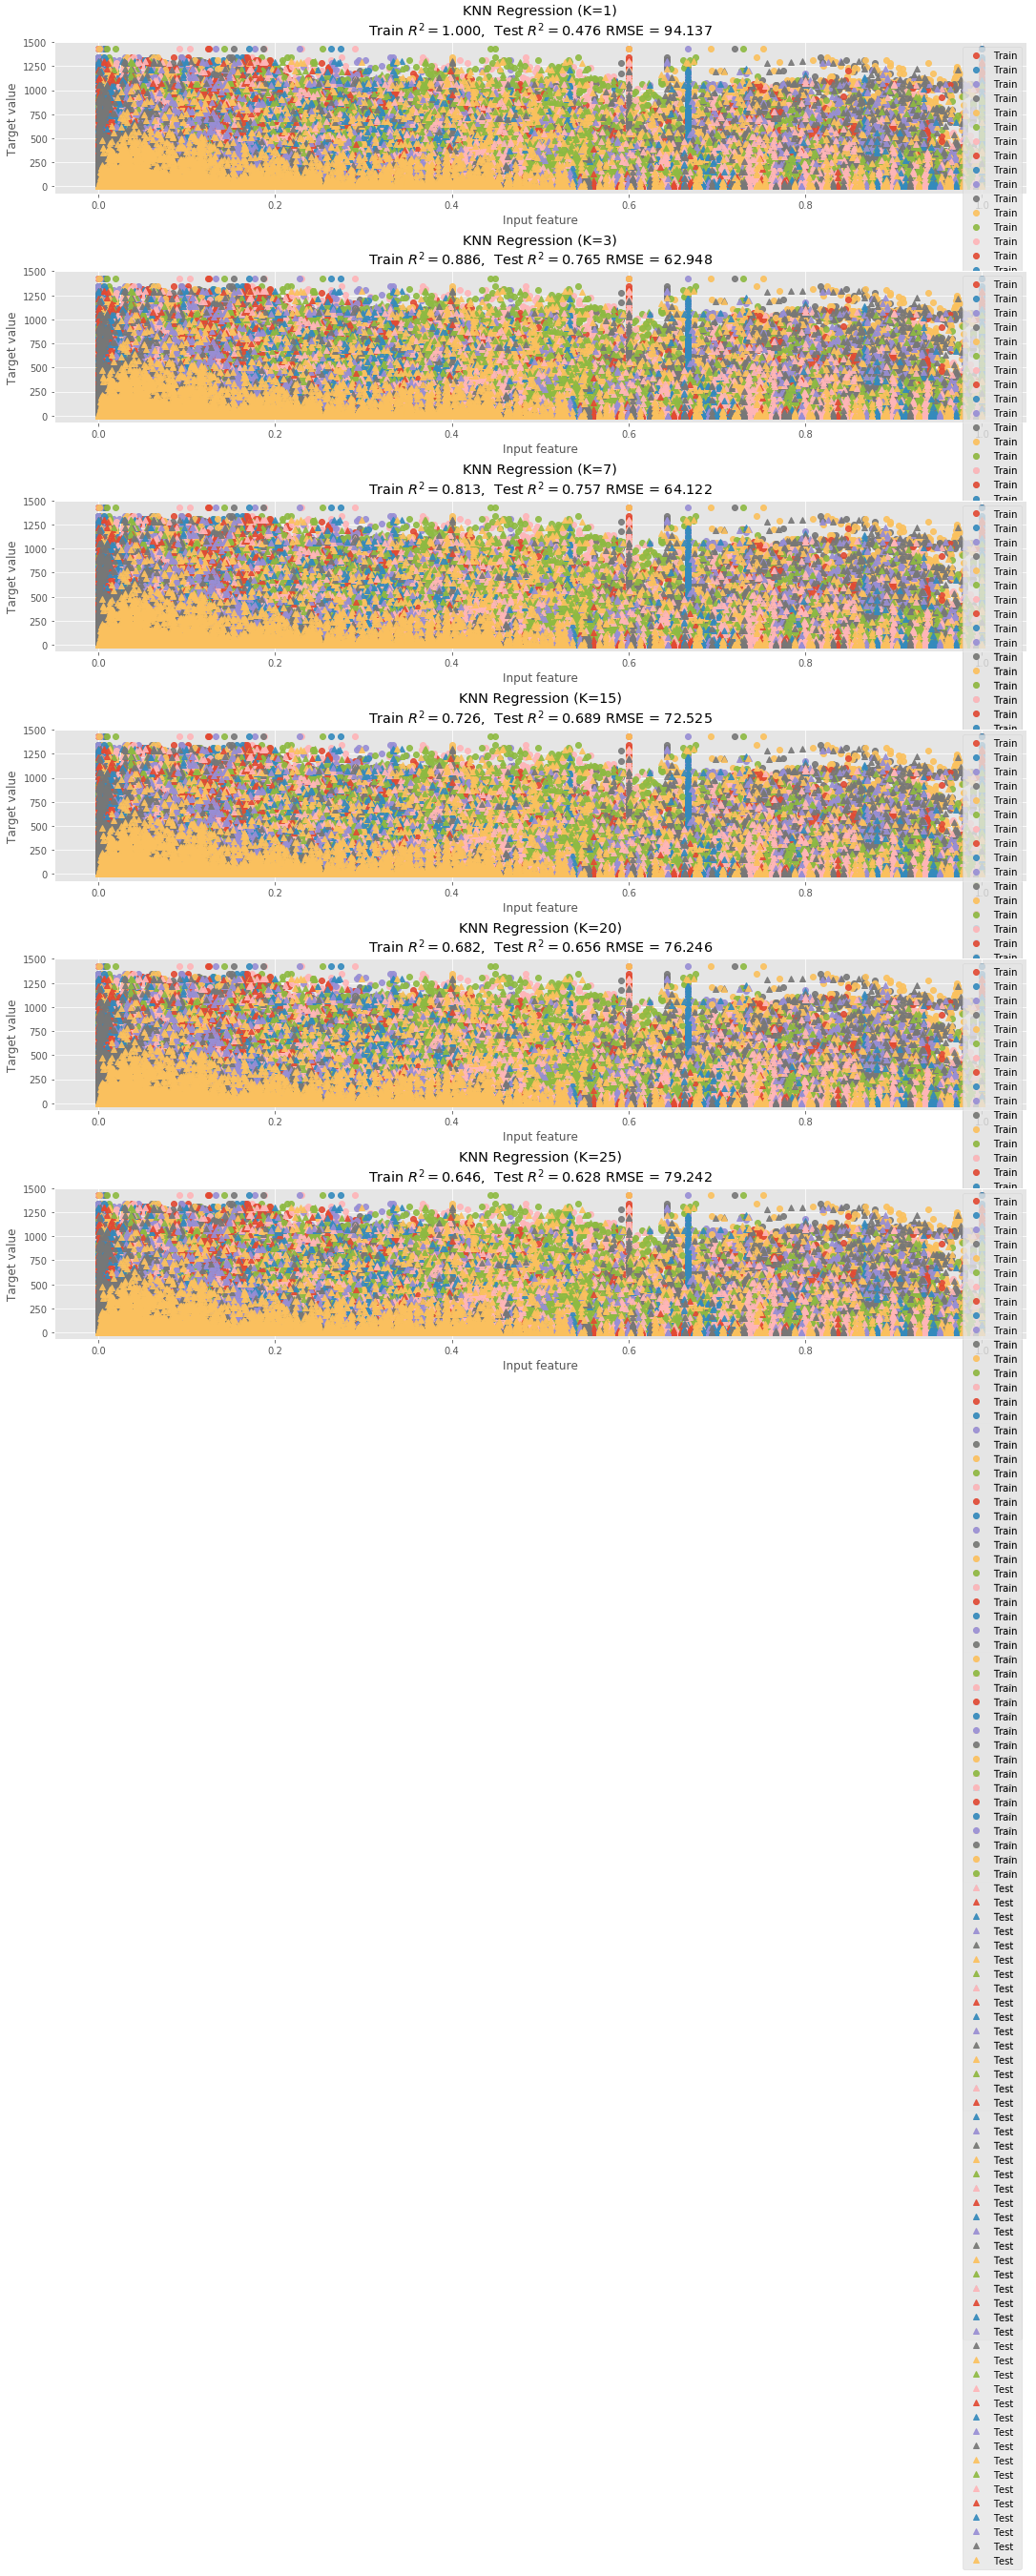

In [9]:
fig, subaxes = plt.subplots(6, 1, figsize=(15,20))
for thisaxis, K in zip(subaxes, [1,3, 7, 15, 20,25]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X1_train, y1_train)
    predictions = knnreg.predict(X1_test)
    train_score = knnreg.score(X1_train, y1_train)
    test_score = knnreg.score(X1_test, y1_test)
    rmse=math.sqrt(mean_squared_error(y1_test, predictions))
    thisaxis.plot(X1_train, y1_train, 'o', alpha=0.9, label='Train')
    thisaxis.plot(X1_test, y1_test, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN Regression (K={})\n\
Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$ RMSE = {:.3f}'
                      .format(K, train_score, test_score,rmse))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

Nous allons donc choisir KNN=7

In [13]:
import math
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
# Create the knn model.
# Look at the five closest neighbors.
knn = KNeighborsRegressor(n_neighbors=7)
# Fit the model on the training data.
regr_knn_fit=knn.fit(X1_train, y1_train)
# Make point predictions on the test set using the fit model.
predictions = knn.predict(X1_test)
# Compute the mean squared error of our predictions.
rmse1=math.sqrt(mean_squared_error(y1_test, predictions))
score_train1=regr_knn_fit.score(X1_train, y1_train)
score_test1=regr_knn_fit.score(X1_test, y1_test)
print('Root mean squared error of KNN regressor : {:.2f}'
     .format(rmse1))
print('R2 of KNN regressor on training set: {:.2f}'
     .format(score_train1))
print('R2 of KNN regressor on test set: {:.2f}'
     .format(score_test1))

Root mean squared error of KNN regressor : 64.12
R2 of KNN regressor on training set: 0.81
R2 of KNN regressor on test set: 0.76


Nous avons decidé de transformer la prediction en classification car les resultats de la prediction ne sont pas satisfaisants.

## KNN Classifier

In [14]:
from sklearn.neighbors import KNeighborsClassifier
# Create the knn model.
# Look at the five closest neighbors.
knn = KNeighborsClassifier(n_neighbors=5)
# Fit the model on the training data.
knn_fit=knn.fit(X_train, y_train)
# Make point predictions on the test set using the fit model.
predictions = knn.predict(X_test)
#print('rmse:'+repr(math.sqrt(mean_squared_error(y_test, predictions))))
rmse3=math.sqrt(mean_squared_error(y_test, predictions))
score_train3=knn_fit.score(X_train, y_train)
score_test3=knn_fit.score(X_test, y_test)
print('Root mean squared error of Decision Tree classifier : {:.2f}'
     .format(rmse3))
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(score_train3))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(score_test3))

Root mean squared error of Decision Tree classifier : 2.76
Accuracy of Decision Tree classifier on training set: 0.59
Accuracy of Decision Tree classifier on test set: 0.41


In [138]:
def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True): 
 

    numClasses = np.amax(y) + 1 
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF'] 
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC'] 
    cmap_light = ListedColormap(color_list_light[0:numClasses]) 
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses]) 
 

    h = 0.03 
    k = 0.5 
    x_plot_adjust = 0.1 
    y_plot_adjust = 0.1 
    plot_symbol_size = 50 
 

    x_min = X.iloc[:, 2].min() 
    x_max = X.iloc[:, 2].max() 
    y_min = X.iloc[:, 1].min() 
    y_max = X.iloc[:, 1].max() 
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h)) 
     # numpy.c_ Translates slice objects to concatenation along the second axis 
     # e.g. np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])] 
     # ravel() Returns a contiguous flattened array. 
     # x = np.array([[1, 2, 3], [4, 5, 6]]) 
     # np.ravel(x) = [1 2 3 4 5 6] 
    P = clf.predict(np.c_[x2.ravel(), y2.ravel()]) 
    P = P.reshape(x2.shape) 
    plt.figure() 
    if plot_decision_regions: 
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8) 
 

        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black') 
        plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust) 
        plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust) 
 

    if (X_test is not None): 
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black') 
        train_score = clf.score(X, y) 
        test_score  = clf.score(X_test, y_test) 
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score) 
 

    if (target_names is not None): 
        legend_handles = [] 
        for i in range(0, len(target_names)): 
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i]) 
            legend_handles.append(patch) 
        plt.legend(loc=0, handles=legend_handles) 
 

    if (title is not None): 
        plt.title(title) 
    plt.show() 
 

In [139]:
#from adspy_shared_utilities import plot_class_regions_for_classifier
plot_class_regions_for_classifier(knn, X_train, y_train, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True)

ValueError: query data dimension must match training data dimension

## Decision tree Regressor

 ### Avec tous les prédicteurs

In [15]:
from sklearn.tree import DecisionTreeRegressor , export_graphviz
# Fit regression model
regr_tree = DecisionTreeRegressor(max_depth=10)
reg_fit=regr_tree.fit(X1_train, y1_train)
pred = regr_tree.predict(X1_test)
rmse2=math.sqrt(mean_squared_error(y1_test, pred))
score_train2=reg_fit.score(X1_train, y1_train)
score_test2=reg_fit.score(X1_test, y1_test)
print('Root mean squared error of Decision Tree Regressor : {:.2f}'
     .format(rmse2))
print('R2 of Decision Tree Regressor on training set: {:.2f}'
     .format(score_train2))
print('R2 of Decision Tree Regressor on test set: {:.2f}'
     .format(score_test2))

Root mean squared error of Decision Tree Regressor : 39.35
R2 of Decision Tree Regressor on training set: 0.97
R2 of Decision Tree Regressor on test set: 0.91


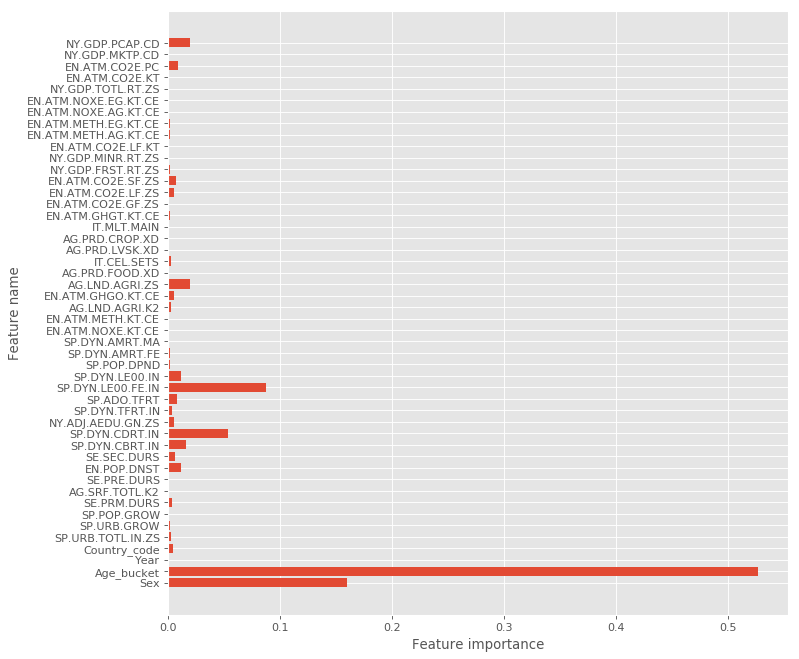

Feature importances: [  1.59572423e-01   5.27329526e-01   5.02512600e-04   4.90473939e-03
   3.21518781e-03   2.27320543e-03   7.42226416e-04   3.95339793e-03
   2.45073855e-06   1.17801838e-04   1.13621828e-02   6.36073301e-03
   1.63417654e-02   5.37536888e-02   5.08824540e-03   3.47661052e-03
   7.81221731e-03   8.77064377e-02   1.17686700e-02   1.50999654e-03
   1.52017370e-03   8.17979522e-04   8.26017845e-04   6.18467029e-04
   3.14539638e-03   5.95153349e-03   1.95895322e-02   7.09459202e-04
   2.69114117e-03   5.56512057e-04   1.00489120e-04   5.11204641e-04
   2.06919163e-03   9.91771191e-04   5.79896682e-03   7.39297842e-03
   1.79200588e-03   5.89921153e-04   1.19943509e-04   2.05582782e-03
   1.64091933e-03   3.59042489e-04   8.97997521e-04   1.15359571e-03
   4.52428260e-04   8.98570454e-03   1.28997062e-03   1.95778093e-02]


In [16]:
from adspy_shared_utilities import plot_feature_importances
features_names=list(X.columns)
plt.figure(figsize=(10,10), dpi=80)
plot_feature_importances(reg_fit, features_names)
plt.show()

print('Feature importances: {}'.format(reg_fit.feature_importances_))

Nous remarquons 4 variables dont l'importance est grande: l'age,le sexe,SP.DYN.CDRT.IN:Death rate, crude (per 1,000 people) et SP.DYN.LE00.FE.IN:Life expectancy at birth, female.

SP.DYN.CDRT.IN: Crude death rate indicates the number of deaths occurring during the year, per 1,000 population estimated at midyear. Subtracting the crude death rate from the crude birth rate provides the rate of natural increase, which is equal to the rate of population change in the absence of migration.

SP.DYN.LE00.FE.IN: Life expectancy at birth indicates the number of years a newborn infant would live if prevailing patterns of mortality at the time of its birth were to stay the same throughout its life.

### Avec les predicteurs les plus importants

In [17]:
Y2=df['Mortality_rate']
X2=scaler.fit_transform(df[['Sex','Age_bucket','Year',	'SP.DYN.CDRT.IN',	'SP.DYN.LE00.FE.IN']])
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2,shuffle=True,random_state=10,test_size=0.30)

In [18]:
from sklearn.tree import DecisionTreeRegressor , export_graphviz
# Fit regression model
regr_tree = DecisionTreeRegressor(max_depth=6)
reg_fit=regr_tree.fit(X2_train, y2_train)
pred = regr_tree.predict(X2_test)
print('Root mean squared error of Decision Tree Regressor : {:.2f}'
     .format(math.sqrt(mean_squared_error(y2_test, pred))))
print('R2 of Decision Tree Regressor on training set: {:.2f}'
     .format(reg_fit.score(X2_train,y2_train)))
print('R2 of Decision Tree Regressor on test set: {:.2f}'
     .format(reg_fit.score(X2_test,y2_test)))

Root mean squared error of Decision Tree Regressor : 52.83
R2 of Decision Tree Regressor on training set: 0.87
R2 of Decision Tree Regressor on test set: 0.83


Nous remarquons qu'en utilisant les 4 variables importantes, les resultats ne sont pas meilleurs car l'erreur est plus grande

## Decision Tree Classifier

 ### Avec tous les prédicteurs

In [19]:
from sklearn.tree import DecisionTreeClassifier
#cOMPARER le precion du modele avec la class la plus frequete
clf_tree = DecisionTreeClassifier(max_depth=8)
clf=clf_tree.fit(X_train, y_train)
pred = clf_tree.predict(X_test)
rmse4=math.sqrt(mean_squared_error(y_test, pred))
score_train4=clf.score(X_train, y_train)
score_test4=clf.score(X_test, y_test)
print('Root mean squared error of Decision Tree classifier : {:.2f}'
     .format(rmse4))
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(score_train4))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(score_test4))


Root mean squared error of Decision Tree classifier : 1.94
Accuracy of Decision Tree classifier on training set: 0.59
Accuracy of Decision Tree classifier on test set: 0.55


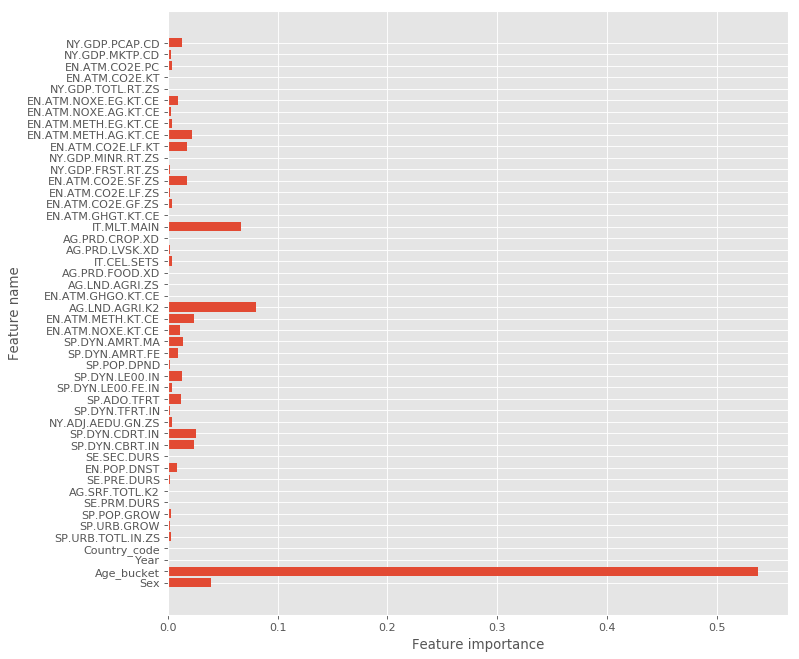

Feature importances: [  3.95167687e-02   5.37761158e-01   0.00000000e+00   8.15006477e-04
   3.13489441e-03   1.84489992e-03   2.72148763e-03   0.00000000e+00
   1.28844980e-03   2.23581491e-03   8.43602644e-03   6.82266306e-04
   2.38477603e-02   2.59063223e-02   3.77731999e-03   1.98008028e-03
   1.19783068e-02   3.81471512e-03   1.29114315e-02   1.60375051e-03
   8.86528650e-03   1.38587892e-02   1.11671743e-02   2.34018681e-02
   8.00468882e-02   6.67202554e-04   1.13144146e-03   1.49865942e-04
   3.50433529e-03   1.77371537e-03   1.54871264e-04   6.68051278e-02
   5.19557346e-04   4.24397160e-03   2.17115937e-03   1.75438084e-02
   2.27596008e-03   2.29903014e-04   1.75513574e-02   2.15587692e-02
   3.41118095e-03   3.02544970e-03   9.66067542e-03   1.47593151e-03
   9.67107210e-04   3.68171470e-03   3.32561877e-03   1.25748103e-02]


In [20]:
from adspy_shared_utilities import plot_feature_importances
features_names=list(X.columns)
plt.figure(figsize=(10,10), dpi=80)
plot_feature_importances(clf, features_names)
plt.show()

print('Feature importances: {}'.format(clf.feature_importances_))

Nous remarquons 4 variables dont l'importance est grande: l'age,le sexe,AG.LND.AGRI.K2:Agricultural land et IT.MLT.MAIN:Fixed telephone subscriptions.

AG.LND.AGRI.K2: Agricultural land refers to the share of land area that is arable, under permanent crops, and under permanent pastures. Arable land includes land defined by the FAO as land under temporary crops (double-cropped areas are counted once), temporary meadows for mowing or for pasture, land under market or kitchen gardens, and land temporarily fallow. Land abandoned as a result of shifting cultivation is excluded. Land under permanent crops is land cultivated with crops that occupy the land for long periods and need not be replanted after each harvest, such as cocoa, coffee, and rubber. This category includes land under flowering shrubs, fruit trees, nut trees, and vines, but excludes land under trees grown for wood or timber. Permanent pasture is land used for five or more years for forage, including natural and cultivated crops

IT.MLT.MAIN: Fixed telephone subscriptions refers to the sum of active number of analogue fixed telephone lines, voice-over-IP (VoIP) subscriptions, fixed wireless local loop (WLL) subscriptions, ISDN voice-channel equivalents and fixed public payphones.

### Avec les predicteurs les plus importants

In [21]:
Y3=df1['Mortality_cat']
X3=scaler.fit_transform(df1[['Sex','Age_bucket','Year',	'AG.LND.AGRI.K2',	'IT.MLT.MAIN']])
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, Y3,shuffle=True,random_state=10,test_size=0.30)

In [22]:
from sklearn.tree import DecisionTreeClassifier
#cOMPARER le precion du modele avec la class la plus frequete
clf_tree = DecisionTreeClassifier(max_depth=7)
clf=clf_tree.fit(X3_train, y3_train)
pred = clf_tree.predict(X3_test)
print('Root mean squared error of Decision Tree classifier : {:.2f}'
     .format(math.sqrt(mean_squared_error(y3_test, pred))))
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X3_train, y3_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X3_test, y3_test)))


Root mean squared error of Decision Tree classifier : 2.06
Accuracy of Decision Tree classifier on training set: 0.52
Accuracy of Decision Tree classifier on test set: 0.51


Nous remarquons qu'en utilisant les 4 variables importantes, les resultats ne sont pas meilleurs car l'erreur est plus grande

In [28]:
import graphviz 
from sklearn.tree import export_graphviz 
import pydotplus 
def plot_decision_tree(clf, feature_names, class_names): 
     # This function requires the pydotplus module and assumes it's been installed. 
     # In some cases (typically under Windows) even after running conda install, there is a problem where the 
     # pydotplus module is not found when running from within the notebook environment.  The following code 
     # may help to guarantee the module is installed in the current notebook environment directory. 
     # 
    import sys; sys.executable 
    !{sys.executable} -m pip install pydotplus 
 
    export_graphviz(clf, out_file="readonly/adspy_temp.dot", feature_names=feature_names, class_names=class_names, filled = True, impurity = False) 
    with open("readonly/adspy_temp.dot") as f: 
        dot_graph = f.read() 
     # Alternate method using pydotplus, if installed. 
     #   graph = pydotplus.graphviz.graph_from_dot_data(dot_graph) 
    #return graph.create_pdf() 
    return graphviz.Source(dot_graph) 
 

In [29]:
#import pydotplus pydotplus.find_graphviz()
import os     
#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz-2.38/bin/'
#os.environ["PATH"] += os.pathsep + 'C:/Users/DIARRA née CISSE Bal/Anaconda3/pkgs/graphviz-2.38.0-4/Library/bin/graphviz'
class_names=np.array(['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18'])
feature_names=np.array(['Sex','Age_bucket','Year',	'AG.LND.AGRI.K2',	'IT.MLT.MAIN'])
#from adspy_shared_utilities import plot_decision_tree
plot_decision_tree(clf,feature_names ,class_names)

'C:\Users\DIARRA' n’est pas reconnu en tant que commande interne
ou externe, un programme exécutable ou un fichier de commandes.


In [128]:
a = {'Models': ['knn regressor','decision tree regressor','knn classifier','decision tree classification'], 'score test': [score_test1,score_test2,score_test3,score_test4] , 'score train': [score_train1,score_train2,score_train3,score_train4],'RMSE': [rmse1,rmse2,rmse3,rmse4]}
df_comparaison=pd.DataFrame(data=a)
df_comparaison

,Models,RMSE,score test,score train
0,knn regressor,62.976628,0.765287,0.845205
1,decision tree regressor,39.076729,0.909632,0.974597
2,knn classifier,2.757637,0.414132,0.590055
3,decision tree classification,1.943408,0.550447,0.589557


### Conclusion:
Dans le cas d'une regression et les modeles utilisés,les variables n'expliquent pas bien les données données. En transformant la regression en classification, le RMSE demeure élevé.